# Multidimensional Scaling

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.datasets import load_digits

In [3]:
def distancia(x, y):

    dif = ((x - y)**2).sum()
    dif_norm = dif**(1/2)

    return dif_norm

# 1. Load Data

In [4]:
data = load_digits()

In [5]:
X, y = data.data, data.target

In [6]:
X.shape

(1797, 64)

# 2. Load model

In [7]:
n_components = 2 
mds = MDS(n_components = n_components)

# 3. Fit Transform

In [8]:
X_reduced = mds.fit_transform(X)

In [9]:
X_reduced.shape

(1797, 2)

# 4. Arrays of distances

In [10]:
N = len(X)

### a. Normal

In [11]:
d_normal = []

In [12]:
for i in range(N):

    col_X_normal = []

    for j in range(N):

        col_X_normal.append(distancia(X[i], X[j]))
    
    d_normal.append(col_X_normal)

In [13]:
d_normal = pd.DataFrame(d_normal)

### b. MDS

In [14]:
d_mds = []

In [15]:
for i in range(N):

    col_X_mds = []

    for j in range(N):

        col_X_mds.append(distancia(X_reduced[i], X_reduced[j]))
    
    d_mds.append(col_X_mds)

In [16]:
d_mds = pd.DataFrame(d_mds)

# 5. Difference

In [17]:
d_dif = (d_normal - d_mds)

In [18]:
errores = []

for i in range(N):

    for j in range(N):

        if i < j:
            
            errores.append(d_dif[i][j])

In [19]:
errores = pd.Series(errores)

In [20]:
errores_norm = (errores - errores.mean())/errores.std()

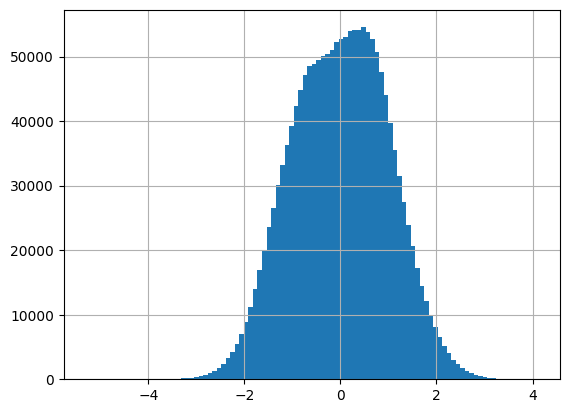

In [21]:
errores_norm.hist(bins = 100)
plt.show()

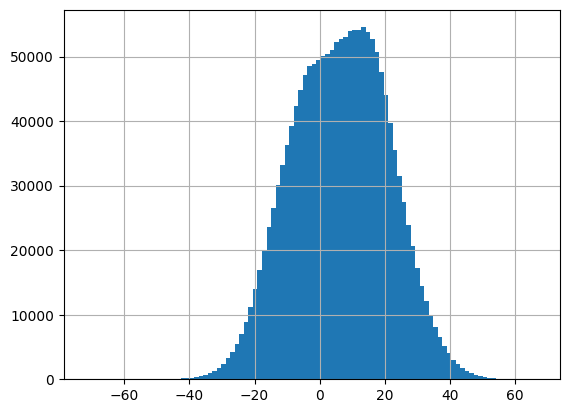

In [22]:
errores.hist(bins = 100)
plt.show()

# 6. Plot

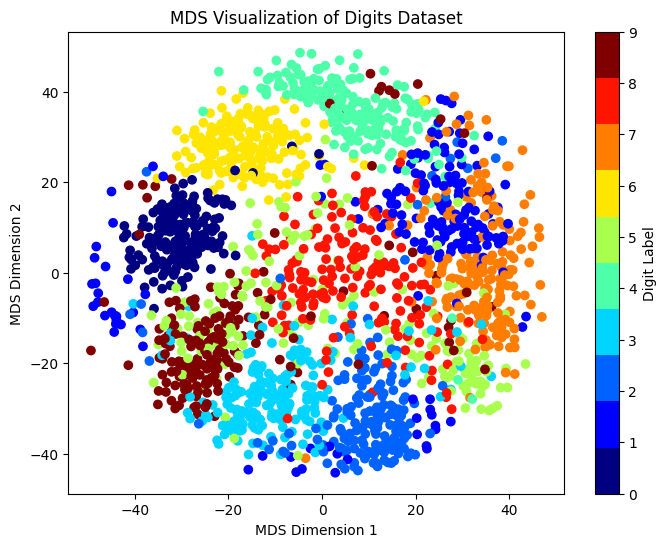

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y, cmap = plt.cm.get_cmap("jet", 10))
plt.colorbar(label='Digit Label', ticks=range(10))
plt.title("MDS Visualization of Digits Dataset")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()